# Recipe Recommendation System 
~ TASTY DISHES ~

- Group 3
- Group Members.
    - Cindy Tumaini
    - Margret Namunyak
    - Faith Wafula
    - Martin Waweru
    - Matthew Karani


## Table Of Contents

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling 
- Evaluation 
  

## Business Understanding

### Business Description 
Tasty Dishes is a web-based culinary platform dedicated to sharing authentic African recipes with the world. Our mission is to enhance the cooking experience of home chefs by providing them with a diverse collection of recipes rooted in African culinary traditions, while also incorporating global influences. Whether you're an experienced cook or just starting, Tasty Dishes offers a wide variety of recipes that empower users to create delicious, flavorful meals from the comfort of their homes.


## Business Goal 
### Objective
The main objective of this project is to develop an item-based recipe recommendation system that suggests recipes to users based on the ingredients they have available. By analyzing the ingredients present in various recipes, the system aims to provide relevant and appealing recommendations that encourage users to explore and cook diverse dishes rooted in African culinary traditions, while also incorporating global flavors.

### Scope

1. Ingredient-Based Recommendations: Develop an algorithm that analyzes user-provided ingredients to recommend recipes based on ingredient similarity, leveraging a diverse dataset that includes recipe_Title, Ingredients, and Instructions for authentic African and global dishes.

2. User-Friendly Interface: Design an intuitive web interface that enables users to input their available ingredients and view tailored recipe recommendations, along with detailed cooking instructions and a feedback mechanism to enhance recommendation accuracy.


### Success Criteria
1. Accuracy:
Achieve at least 80% accuracy in recommending relevant recipes based on user-provided ingredients.

2. Precision:
Ensure that at least 75% of recommended recipes correspond to the user’s input ingredients.

3. Recall:
Aim for a recall rate of at least 70%, indicating the system identifies a significant portion of relevant recipes.

4. F1 Score:
Target an F1 score of 0.75 or higher, balancing precision and recall for comprehensive recommendations.






## Data Understanding

### Data Sources 

The data was sourced from various datasets. I,e





In [48]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Data Frame One

In [49]:
# Load the dataframe

df = pd.read_csv("Food Ingredients and Recipe Dataset with Image Name Mapping.csv", index_col=0)


# Display the first columns
display(df.head(10))

#show the shape
print(df.shape)

Title  \
0  Miso-Butter Roast Chicken With Acorn Squash Pa...   
1                    Crispy Salt and Pepper Potatoes   
2                        Thanksgiving Mac and Cheese   
3                 Italian Sausage and Bread Stuffing   
4                                       Newton's Law   
5                                       Warm Comfort   
6                                 Apples and Oranges   
7                                 Turmeric Hot Toddy   
8                            Instant Pot Lamb Haleem   
9     Spiced Lentil and Caramelized Onion Baked Eggs   

                                         Ingredients  \
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...   
1  ['2 large egg whites', '1 pound new potatoes (...   
2  ['1 cup evaporated milk', '1 cup whole milk', ...   
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...   
5  ['2 chamomile tea bags', '1½ oz. reposado tequ...   
6  ['3 oz. Grand Marnier', '1 oz. Amaro Averna', ...   
7  ['¼ cup granulated sugar', '¾ tsp. ground turm...   
8  ['¾ cup assorted dals (such as chana dal, moon...   
9  ['1 (14.5-ounce) can basic lentil soup, like A...   

                                        Instructions  \
0  Pat chicken dry with paper towels, season all ...   
1  Preheat oven to 400°F and line a rimmed baking...   
2  Place a rack in middle of oven; preheat to 400...   
3  Preheat oven to 350°F with rack in middle. Gen...   
4  Stir together brown sugar and hot water in a c...   
5  Place 2 chamomile tea bags in a heatsafe vesse...   
6  Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...   
7  For the turmeric syrup, combine ½ cup hot wate...   
8  Combine dals, rice, and barley in a medium bow...   
9  Place an oven rack in the center of the oven, ...   

                                          Image_Name  \
0  miso-butter-roast-chicken-acorn-squash-panzanella   
1         crispy-salt-and-pepper-potatoes-dan-kluger   
2         thanksgiving-mac-and-cheese-erick-williams   
3          italian-sausage-and-bread-stuffing-240559   
4                 newtons-law-apple-bourbon-cocktail   
5               warm-comfort-tequila-chamomile-toddy   
6                    apples-and-oranges-spiked-cider   
7                  turmeric-hot-toddy-claire-sprouse   
8                            instant-pot-lamb-haleem   
9     spiced-lentil-and-caramelized-onion-baked-eggs   

                                 Cleaned_Ingredients  
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...  
1  ['2 large egg whites', '1 pound new potatoes (...  
2  ['1 cup evaporated milk', '1 cup whole milk', ...  
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...  
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...  
5  ['2 chamomile tea bags', '1½ oz. reposado tequ...  
6  ['3 oz. Grand Marnier', '1 oz. Amaro Averna', ...  
7  ['¼ cup granulated sugar', '¾ tsp. ground turm...  
8  ['¾ cup assorted dals (such as chana dal, moon...  
9  ['1 (14.5-ounce) can basic lentil soup, like A...

(13501, 5)


# 3. Data Preparation

- Check for duplicates


In [50]:
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0


In [51]:
#drop duplicates
df.drop_duplicates(inplace=True)
print(f'Number of duplicates after dropping: {df.duplicated().sum()}')

Number of duplicates after dropping: 0


- Check for missing values

In [52]:
df.isnull().sum().sort_values(ascending=False)

Instructions           8
Title                  5
Ingredients            0
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [53]:
#drop rows with missing values
df.dropna(inplace=True)
print(f'Number of missing values after dropping: {df.isnull().sum().sum()}')

Number of missing values after dropping: 0


- There is the Ingredients and Cleaned Ingredients column, check if there is any difference between the two.

In [54]:
df['Ingredients'][5]

"['2 chamomile tea bags', '1½ oz. reposado tequila', '¾ oz. fresh lemon juice', '1 Tbsp. agave nectar']"

In [55]:
df['Cleaned_Ingredients'][5]

"['2 chamomile tea bags', '1½ oz. reposado tequila', '¾ oz. fresh lemon juice', '1 Tbsp. agave nectar']"

- There's no significant difference between Ingredients and cleaned Ingredients. Thus, we drop the Ingredients column and rename cleaned_ingredients  ingredients.

In [56]:
#move the cleaned_ingredients column to the second column
df = df[['Title', 'Cleaned_Ingredients', 'Ingredients', 'Instructions', 'Image_Name']]

#drop the ingredients column
df = df.drop(columns=['Ingredients','Image_Name'])


In [57]:
# rename the cleaned ingredients column
df = df.rename(columns={'Cleaned_Ingredients':'Ingredients'})
df.head()


Title  \
0  Miso-Butter Roast Chicken With Acorn Squash Pa...   
1                    Crispy Salt and Pepper Potatoes   
2                        Thanksgiving Mac and Cheese   
3                 Italian Sausage and Bread Stuffing   
4                                       Newton's Law   

                                         Ingredients  \
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...   
1  ['2 large egg whites', '1 pound new potatoes (...   
2  ['1 cup evaporated milk', '1 cup whole milk', ...   
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...   

                                        Instructions  
0  Pat chicken dry with paper towels, season all ...  
1  Preheat oven to 400°F and line a rimmed baking...  
2  Place a rack in middle of oven; preheat to 400...  
3  Preheat oven to 350°F with rack in middle. Gen...  
4  Stir together brown sugar and hot water in a c...

In [58]:
df['Ingredients'][5]

"['2 chamomile tea bags', '1½ oz. reposado tequila', '¾ oz. fresh lemon juice', '1 Tbsp. agave nectar']"

### DataFrame two 

In [59]:
#explore the recipeslmp.csv file
df2 = pd.read_csv("RecipesImp.csv")
display(df2.head())

#display the shape
print(df2.shape)

title  index  page  \
0                           Kaimati(Fried Dumplings)  15003    24   
1                      Mahamri\r\n(Swahili Doughnut)  15004    26   
2  Enriched Mandazi \r\n(East African Doughnuts, ...  15124    28   
3  Basic Mandazi \r\n(East African Doughnuts, Basic)  15125    30   
4                  Meat Samosa\r\n(Sambusa ya Nyama)  15025    32   

                                               about  \
0  Kaimatis get their unique flavour from the sty...   
1  This is a typical traditional recipe among the...   
2  A popular snack among urban dwellers across th...   
3  You will find this recipe in any home across K...   
4  Nothing more delicious like the Kenyan meaty s...   

                                         ingridients  \
0   wheat flour, refined\r\nwater, vanilla essenc...   
1  wheat flour,\r\ncoconut milk\r\nwhite sugar\r\...   
2  self-raising wheat flour\r\neggs\r\nmargarine\...   
3  all-purpose wheat flour\r\nbaking powder\r\nsu...   
4  minced beef\r\ncoriander, fresh\r\nleek\r\ngar...   

                                         preparation  \
0   Put yeast in a small container.\r\n Add 50ml ...   
1    Break the coconut shell, drain the water and...   
2  ?  Put flour, salt, sugar and lemon rind into ...   
3  ?  Put the wheat flour into a bowl, add baking...   
4  ?  Put the meat in a pan over a fire. Stir con...   

                        nutrition per 100g of recipe  energy(kcal)  fat(g)  \
0  Energy 1,795 kJ/ 429 kcal | Fat 21.8 g | Carbo...         429.0    21.8   
1  Energy 1,728 kJ/ 413 kcal | Fat 22.1 g | Carbo...         413.0    22.1   
2  Energy 1,590 kJ/ 379 kcal | Fat 16.1 g | Carbo...         379.0    16.1   
3  Energy 1,430kJ/ 340 kcal | Fat 12.9 g | Carboh...         340.0    12.9   
4  Energy 1,854 kJ/ 443 kcal | Fat 22.2 g | Carbo...         443.0    22.2   

   carbohydrates(g)  proteins(g)  fibre(g) vitamin A(mcg)  iron(mg)  zinc(mg)  \
0              52.8          4.6       1.6             30       2.1      0.45   
1              46.6          6.0       2.1             41       2.8      0.56   
2              49.9          7.6       2.2             90       3.3      0.66   
3              48.7          6.4       2.1             48       3.5      0.52   
4              40.5         18.8       3.1             66      11.5      2.99   

   F_factor_est  
0           0.4  
1           0.4  
2           0.4  
3           0.4  
4           0.4

(142, 16)


- Since we want only a few columns to recommend the possible recipes, we need to drop some columns.

In [60]:
df2.columns


Index(['title', 'index', 'page', 'about', 'ingridients', 'preparation',
       'nutrition per 100g of recipe', 'energy(kcal)', 'fat(g)',
       'carbohydrates(g)', 'proteins(g)', 'fibre(g)', 'vitamin A(mcg)',
       'iron(mg)', 'zinc(mg)', 'F_factor_est'],
      dtype='object')

In [61]:
columns_to_keep = ['title','ingridients','preparation']

df2 = df2[columns_to_keep]
df2.head()

title  \
0                           Kaimati(Fried Dumplings)   
1                      Mahamri\r\n(Swahili Doughnut)   
2  Enriched Mandazi \r\n(East African Doughnuts, ...   
3  Basic Mandazi \r\n(East African Doughnuts, Basic)   
4                  Meat Samosa\r\n(Sambusa ya Nyama)   

                                         ingridients  \
0   wheat flour, refined\r\nwater, vanilla essenc...   
1  wheat flour,\r\ncoconut milk\r\nwhite sugar\r\...   
2  self-raising wheat flour\r\neggs\r\nmargarine\...   
3  all-purpose wheat flour\r\nbaking powder\r\nsu...   
4  minced beef\r\ncoriander, fresh\r\nleek\r\ngar...   

                                         preparation  
0   Put yeast in a small container.\r\n Add 50ml ...  
1    Break the coconut shell, drain the water and...  
2  ?  Put flour, salt, sugar and lemon rind into ...  
3  ?  Put the wheat flour into a bowl, add baking...  
4  ?  Put the meat in a pan over a fire. Stir con...

In [62]:
#clean the column names
#change the ingridient column name to ingredients
df2.rename(columns={'ingridients':'ingredients','preparation':'instructions'}, inplace=True)

#capitalize the column names
df2.columns = df2.columns.str.capitalize()

# Function to process the Ingredients column
def process_ingredients(ingredients):
    # Remove unwanted characters and split by commas
    return [ingredient.strip() for ingredient in ingredients.replace('[','').replace(']','').replace("'", "").replace('\n', ',').split(',')]

# Apply the function to each DataFrame
df['Ingredients'] = df['Ingredients'].apply(lambda x: [ingredient.strip() for ingredient in x.split(',')])
df2['Ingredients'] = df2['Ingredients'].apply(process_ingredients)




In [63]:
# Check the processed DataFrames
df[['Title', 'Ingredients']]


Title  \
0      Miso-Butter Roast Chicken With Acorn Squash Pa...   
1                        Crispy Salt and Pepper Potatoes   
2                            Thanksgiving Mac and Cheese   
3                     Italian Sausage and Bread Stuffing   
4                                           Newton's Law   
...                                                  ...   
13496                               Brownie Pudding Cake   
13497  Israeli Couscous with Roasted Butternut Squash...   
13498  Rice with Soy-Glazed Bonito Flakes and Sesame ...   
13499                                        Spanakopita   
13500  Mexican Poblano, Spinach, and Black Bean "Lasa...   

                                             Ingredients  
0      [['1 (3½–4-lb.) whole chicken', '2¾ tsp. koshe...  
1      [['2 large egg whites', '1 pound new potatoes ...  
2      [['1 cup evaporated milk', '1 cup whole milk',...  
3      [['1 (¾- to 1-pound) round Italian loaf, cut i...  
4      [['1 teaspoon dark brown sugar', '1 teaspoon h...  
...                                                  ...  
13496  [['1 cup all-purpose flour', '2/3 cup unsweete...  
13497  [['1 preserved lemon', '1 1/2 pound butternut ...  
13498  [['Leftover katsuo bushi (dried bonito flakes)...  
13499  [['1 stick (1/2 cup) plus 1 tablespoon unsalte...  
13500  [['12 medium to large fresh poblano chiles (2 ...  

[13493 rows x 2 columns]

In [64]:
df2[['Title', 'Ingredients']]

Title  \
0                             Kaimati(Fried Dumplings)   
1                        Mahamri\r\n(Swahili Doughnut)   
2    Enriched Mandazi \r\n(East African Doughnuts, ...   
3    Basic Mandazi \r\n(East African Doughnuts, Basic)   
4                    Meat Samosa\r\n(Sambusa ya Nyama)   
..                                                 ...   
137                   Bhature\r\n (Fried Indian Bread)   
138  Vimumunya vya \r\nSukari\r\n (Sweetened Pumpki...   
139                         Siro\r\n (Semolina & Nuts)   
140                         Chaas\r\n(Diluted Yoghurt)   
141                                    Groundnut Sauce   

                                           Ingredients  
0    [wheat flour, refined, water, vanilla essence,...  
1    [wheat flour, , coconut milk, white sugar, dry...  
2    [self-raising wheat flour, eggs, margarine, Ri...  
3    [all-purpose wheat flour, baking powder, sugar...  
4    [minced beef, coriander, fresh, leek, garlic, ...  
..                                                 ...  
137  [wheat flour, salt, sugar, ghee, cooking oil, ...  
138    [pumpkin, cardamon, sugar, coconut milk, water]  
139  [semolina flour, cow ghee, cow milk, sugar, pi...  
140                   [natural yoghurt, water, salt, ]  
141                [groundnut, salt, sour milk, water]  

[142 rows x 2 columns]

- Chek for missing values

In [65]:
print(f'number of missing values: {df2.isnull().sum().sum()}')

number of missing values: 0


- Since both dataframes have no missing values and duplicates we can merge them now

In [66]:
#merge the two dataframes
combined_df = pd.concat([df,df2])
#check the shapes of the three dfs
print(f'Dataframe 1 has a shape of: {df.shape}')
print(f'Dataframe 2 has a shape of: {df2.shape}')
print(f'Combined dataframe has a shape of: {combined_df.shape}')

#reset the index
combined_df = combined_df.reset_index(drop=True)



Dataframe 1 has a shape of: (13493, 3)
Dataframe 2 has a shape of: (142, 3)
Combined dataframe has a shape of: (13635, 3)


## 3. Data Preparation

### Clean the Combined DataFrame

In [67]:
combined_df.head()

Title  \
0  Miso-Butter Roast Chicken With Acorn Squash Pa...   
1                    Crispy Salt and Pepper Potatoes   
2                        Thanksgiving Mac and Cheese   
3                 Italian Sausage and Bread Stuffing   
4                                       Newton's Law   

                                         Ingredients  \
0  [['1 (3½–4-lb.) whole chicken', '2¾ tsp. koshe...   
1  [['2 large egg whites', '1 pound new potatoes ...   
2  [['1 cup evaporated milk', '1 cup whole milk',...   
3  [['1 (¾- to 1-pound) round Italian loaf, cut i...   
4  [['1 teaspoon dark brown sugar', '1 teaspoon h...   

                                        Instructions  
0  Pat chicken dry with paper towels, season all ...  
1  Preheat oven to 400°F and line a rimmed baking...  
2  Place a rack in middle of oven; preheat to 400...  
3  Preheat oven to 350°F with rack in middle. Gen...  
4  Stir together brown sugar and hot water in a c...

In [68]:
combined_df[-10:]

Title  \
13625           Vinolo\r\n(Banana and Maize Flour Ugali)   
13626                      Finger Millet \r\nFlour Ugali   
13627                                      White Chapati   
13628                                      Brown Chapati   
13629                          Roti \r\n(Indian Chapati)   
13630                   Bhature\r\n (Fried Indian Bread)   
13631  Vimumunya vya \r\nSukari\r\n (Sweetened Pumpki...   
13632                         Siro\r\n (Semolina & Nuts)   
13633                         Chaas\r\n(Diluted Yoghurt)   
13634                                    Groundnut Sauce   

                                             Ingredients  \
13625                 [banana green, maize flour, water]   
13626                             [finger millet, water]   
13627     [wheat flour, water, sugar, salt, cooking oil]   
13628   [wheat flour, water, sugar, , salt, cooking oil]   
13629  [wheat flour, salt, water, cooking oil, cow ghee]   
13630  [wheat flour, salt, sugar, ghee, cooking oil, ...   
13631    [pumpkin, cardamon, sugar, coconut milk, water]   
13632  [semolina flour, cow ghee, cow milk, sugar, pi...   
13633                   [natural yoghurt, water, salt, ]   
13634                [groundnut, salt, sour milk, water]   

                                            Instructions  
13625  Preparation 5 minutes | Cooking 40 minutes | \...  
13626  Preparation time 5 minutes | Cooking time 15 m...  
13627  Preparation 30 minutes | Cooking 30 minutes | ...  
13628  Preparation 30 minutes | Cooking 30 minutes | ...  
13629  Preparation 3 hours | Cooking 21 minutes | Ser...  
13630  Preparation 1 hour 15 minutes | Cooking 30 min...  
13631  Preparation 5 minutes | Cooking 45 minutes | \...  
13632  Preparation 15 minutes | Cooking 30 minutes | ...  
13633  Preparation 5 minutes | Serves 2\r\n?Add natur...  
13634  Preparation 5 minutes | Cooking 1 hour 40 minu...

In [69]:
#check for missing values
print(combined_df.isnull().sum().sort_values(ascending=False))


Title           0
Ingredients     0
Instructions    0
dtype: int64


- Clean the columns of the combined_df

In [70]:
#write a function to clean the columns
"""
This function should:
1. Clean the Title Column: Remove newlines and extra spaces
2. Clean the Ingredients Column: Convert string ingredients to lists: If they are not already in a list format, convert them and clean any extra spaces.
                                Ensure there are no empty strings or duplicates within each list of ingredients.
3. Clean the Instructions Column: Similar to the Title, ensure that the instructions are clean and properly formatted.
"""

def clean_combined_df(df):
    #title column
    # Remove newlines and extra spaces
    df['Title'] = df['Title'].str.replace('\n', '').str.strip()
    #Ingredients column
    # Remove empty ingredients from each list of ingredients
    df['Ingredients'] = df['Ingredients'].apply(lambda x: [ingredient.strip() for ingredient in x if ingredient.strip() != ''])

    # If there are any duplicate ingredients in each list, remove them
    df['Ingredients'] = df['Ingredients'].apply(lambda x: list(set(x)))

    # Clean the Instructions column
    df['Instructions'] = df['Instructions'].str.replace('\n', '') \
                                       .str.replace('?', '.') \
                                       .str.replace('|', ',') \
                                       .str.replace('\r', '') \
                                       .str.strip()
    #remove   special characters like \x02 from words like  gradu\x02ally
    df['Instructions'] = df['Instructions'].apply(lambda x: re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', x))#remove special characters
    #if a sentence has more than one fullstop, replace it with one
    df['Instructions'] = df['Instructions'].apply(lambda x: re.sub(r'\.{2,}', '.', x))
    return df

# Use the function on your DataFrame
combined_cleaned = clean_combined_df(combined_df)
combined_cleaned

Title  \
0      Miso-Butter Roast Chicken With Acorn Squash Pa...   
1                        Crispy Salt and Pepper Potatoes   
2                            Thanksgiving Mac and Cheese   
3                     Italian Sausage and Bread Stuffing   
4                                           Newton's Law   
...                                                  ...   
13630                     Bhature\r (Fried Indian Bread)   
13631  Vimumunya vya \rSukari\r (Sweetened Pumpkin & ...   
13632                           Siro\r (Semolina & Nuts)   
13633                           Chaas\r(Diluted Yoghurt)   
13634                                    Groundnut Sauce   

                                             Ingredients  \
0      [cored, 'freshly ground pepper'], '1 Tbsp. fin...   
1      ['1 pound new potatoes (about 1 inch in diamet...   
2      ['1 tsp. kosher salt, ['1 cup evaporated milk'...   
3      [divided', '4 large celery ribs, cut into piec...   
4      ['1 teaspoon hot water', '2 teaspoons apple bu...   
...                                                  ...   
13630  [coriander, wheat flour, sugar, cooking oil, n...   
13631    [cardamon, sugar, pumpkin, coconut milk, water]   
13632  [cow ghee, almond, cardamon, pistachio nut, su...   
13633                     [natural yoghurt, salt, water]   
13634                [sour milk, salt, groundnut, water]   

                                            Instructions  
0      Pat chicken dry with paper towels, season all ...  
1      Preheat oven to 400F and line a rimmed baking ...  
2      Place a rack in middle of oven; preheat to 400...  
3      Preheat oven to 350F with rack in middle. Gene...  
4      Stir together brown sugar and hot water in a c...  
...                                                  ...  
13630  Preparation 1 hour 15 minutes , Cooking 30 min...  
13631  Preparation 5 minutes , Cooking 45 minutes , S...  
13632  Preparation 15 minutes , Cooking 30 minutes , ...  
13633  Preparation 5 minutes , Serves 2.Add natural y...  
13634  Preparation 5 minutes , Cooking 1 hour 40 minu...  

[13635 rows x 3 columns]

In [71]:
combined_cleaned['Instructions'][13634]

'Preparation 5 minutes , Cooking 1 hour 40 minutes , Serves 4.Place a saucepan over fire and let it preheat.Add the groundnuts, salt and 1/2 a cup of water oras desired.Cook until the water evaporates as you stir gradually. When ready, the nuts produce a pop sound.Once they pop, turn down the heat and continue stirring until the groundnuts are dry (about 13minutes).Remove from heat and allow it to cool down.Using a blender, blend the nuts into a paste. Apestle and mortar can be used in the absence of ablender.Put the groundnut paste into a bowl, add sour milkand stir into thick paste. Water or fresh milk can beused in place of the sour milk.Once ready, put another pan on the heat, add thepeanut paste and stir.Stir until it is smooth but not too thick.Serve hot with green leafy vegetables of yourchoice, fish, sweet potatoes, green bananas, ugali,etc'

## Exploratory Data Modelling(EDA)

### 1 . The most popular ingredients(Most used ingredient)

All Ingredients Collected:
['cored', "'freshly ground pepper']", "'1 Tbsp. finely chopped rosemary'", "plus more'", "'2 tsp. white miso'", 'cut into 1" pieces\'', "'¼ tsp. ground allspice'", "'2 medium apples (such as Gala or Pink Lady; about 14 oz. total)", 'melted', "'2 cups unsalted chicken broth'", "'Kosher salt'", "'6 Tbsp. unsalted butter", "'2 Tbsp. finely chopped sage'", "plus 3 Tbsp. room temperature'", "'2 Tbsp. extra-virgin olive oil'", "'2¾ tsp. kosher salt", "room temperature'", 'torn into 1" pieces (about 2½ cups)\'', "'½ small red onion", "'2 Tbsp. unsalted butter", "thinly sliced'", 'divided', "'⅓ loaf good-quality sturdy white bread", "'1 Tbsp. white miso'", "'Pinch of crushed red pepper flakes'", "'¼ cup all-purpose flour'", "'2 small acorn squash (about 3 lb. total)'", "'¼ cup dry white wine'", "'3 Tbsp. apple cider vinegar'", "['1 (3½–4-lb.) whole chicken'", "'Freshly ground black pepper'", "'1 pound new potatoes (about 1 inch in diameter)'", "'2 teaspoons kosher sa

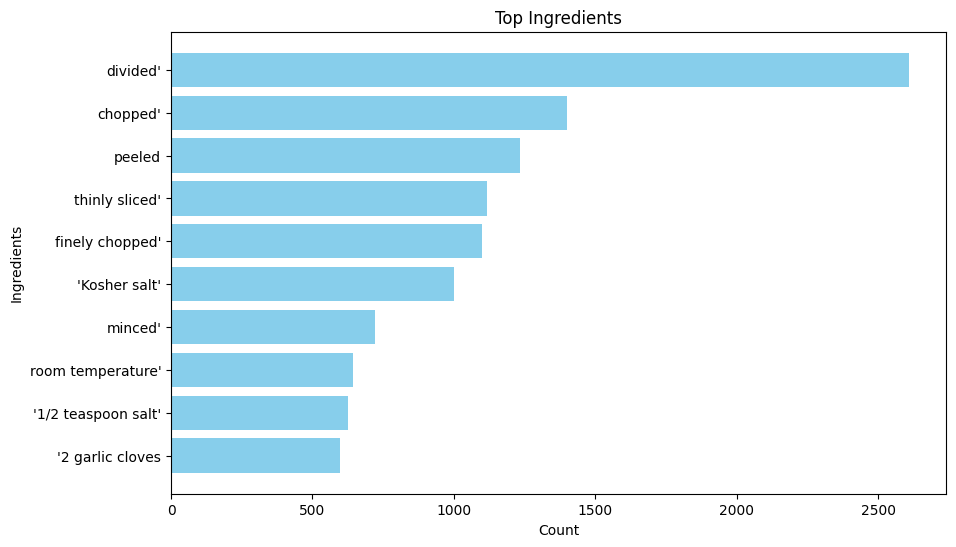

In [72]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to find the most common ingredients
def most_common_ingredients(df):
    # Check if the 'Ingredients' column contains lists of strings
    if df['Ingredients'].apply(lambda x: isinstance(x, list) and all(isinstance(i, str) for i in x)).all():
        all_ingredients = []
        for ingredients_list in df['Ingredients']:
            # For each ingredient in the list, split by commas and strip whitespace
            for ingredient in ingredients_list:
                # Split the ingredient string by commas and strip whitespace
                separated_ingredients = [item.strip() for item in ingredient.split(',')]
                all_ingredients.extend(separated_ingredients)
        
        # Debugging: Print the list of all ingredients
        print("All Ingredients Collected:")
        print(all_ingredients)  # Check the output of this list
        
        # Count the frequency of each ingredient
        ingredient_count = Counter(all_ingredients)
        
        # Return a DataFrame of the most common ingredients and their counts
        return pd.DataFrame(ingredient_count.most_common(), columns=['Ingredient', 'Count'])
    else:
        raise ValueError("Ingredients column must contain lists of strings")

# Function to plot the top ingredients
def plot_top_ingredients(ingredient_df, top_n=10):
    plt.figure(figsize=(10, 6))
    plt.barh(ingredient_df['Ingredient'][:top_n], ingredient_df['Count'][:top_n], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Ingredients')
    plt.title('Top Ingredients')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most common ingredient on top
    plt.show()

# Example usage with your DataFrame
# df = pd.read_csv('your_data.csv')  # Load your DataFrame here
# common_ingredients_df = most_common_ingredients(df)
# plot_top_ingredients(common_ingredients_df, top_n=10)

# Example usage with your DataFrame
# df = pd.read_csv('your_data.csv')  # Load your DataFrame here
common_ingredients_df = most_common_ingredients(combined_cleaned)
plot_top_ingredients(common_ingredients_df, top_n=10)



### 2. The most commonly used preparation word by count
e.g Preheat in the oven ... etc

In [73]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to find the most common ingredients
def most_common_ingredients(df):
    # Check if the 'Ingredients' column contains lists of strings
    if df['Ingredients'].apply(lambda x: isinstance(x, list) and all(isinstance(i, str) for i in x)).all():
        all_ingredients = []
        for ingredients_list in df['Ingredients']:
            # For each ingredient in the list, split by commas and strip whitespace
            for ingredient in ingredients_list:
                # Split the ingredient string by commas and strip whitespace
                separated_ingredients = [item.strip() for item in ingredient.split(',')]
                all_ingredients.extend(separated_ingredients)
        
        # Debugging: Print the list of all ingredients
        print("All Ingredients Collected:")
        print(all_ingredients)  # Check the output of this list
        
        # Count the frequency of each ingredient
        ingredient_count = Counter(all_ingredients)
        
        # Return a DataFrame of the most common ingredients and their counts
        return pd.DataFrame(ingredient_count.most_common(), columns=['Ingredient', 'Count'])
    else:
        raise ValueError("Ingredients column must contain lists of strings")

# Function to plot the top ingredients
def plot_top_ingredients(ingredient_df, top_n=10):
    plt.figure(figsize=(10, 6))
    plt.barh(ingredient_df['Ingredient'][:top_n], ingredient_df['Count'][:top_n], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Ingredients')
    plt.title('Top Ingredients')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most common ingredient on top
    plt.show()



### 3. Recipies with the most common ingredients


In [74]:
import pandas as pd
from collections import Counter

# Function to find the most common ingredients
def most_common_ingredients(df):
    # Check if the 'Ingredients' column contains lists of strings
    if df['Ingredients'].apply(lambda x: isinstance(x, list) and all(isinstance(i, str) for i in x)).all():
        all_ingredients = []
        for ingredients_list in df['Ingredients']:
            # Join the list into a single string and then split by commas
            combined_string = ', '.join(ingredients_list)
            separated_ingredients = [ingredient.strip() for ingredient in combined_string.split(',')]
            all_ingredients.extend(separated_ingredients)

        # Count the frequency of each ingredient
        ingredient_count = Counter(all_ingredients)
        return ingredient_count.most_common()  # Returns a list of tuples (ingredient, count)
    else:
        raise ValueError("Ingredients column must contain lists of strings")

# Function to get recipes with the most common ingredients
def recipes_with_common_ingredients(df, top_n=10):
    # Get the most common ingredients
    common_ingredients = most_common_ingredients(df)
    
    # Extract the top N ingredients
    top_ingredients = [ingredient[0] for ingredient in common_ingredients[:top_n]]
    
    # Filter the recipes that contain any of the top ingredients
    filtered_recipes = df[df['Ingredients'].apply(lambda x: any(ingredient in x for ingredient in top_ingredients))]
    
    return filtered_recipes, top_ingredients

# Example usage with your DataFrame
# df = pd.read_csv('your_data.csv')  # Load your DataFrame here
filtered_recipes, top_ingredients = recipes_with_common_ingredients(combined_cleaned)

# Display the results
print("Top Common Ingredients:")
print(top_ingredients)
print("\nRecipes with the Most Common Ingredients:")
print(filtered_recipes)


Top Common Ingredients:
["divided'", "chopped'", 'peeled', "thinly sliced'", "finely chopped'", "'Kosher salt'", "minced'", "room temperature'", "'1/2 teaspoon salt'", "'2 garlic cloves"]

Recipes with the Most Common Ingredients:
                                                   Title  \
0      Miso-Butter Roast Chicken With Acorn Squash Pa...   
3                     Italian Sausage and Bread Stuffing   
8                                Instant Pot Lamb Haleem   
9         Spiced Lentil and Caramelized Onion Baked Eggs   
10                                Hot Pimento Cheese Dip   
...                                                  ...   
13484          Cornmeal Pancakes with Honey-Pecan Butter   
13485  Chocolate Heart Layer Cake with Chocolate-Cinn...   
13486      Ginger-Pecan Roulade with Honey-Glazed Pecans   
13489  Israeli Couscous with Roasted Butternut Squash...   
13492  Mexican Poblano, Spinach, and Black Bean "Lasa...   

                                             Ing

### Function to get Recipes based on Ingredients

- Let's see if we can tokenize our Ingredients and see if the system recommends recipes based on the ingredients

In [75]:

def clean_ingredients(ingredients_list):
    # Remove any extra single quotes and fix formatting for each ingredient
    cleaned_list = [re.sub(r"['\"]", "", ingredient) for ingredient in ingredients_list]  # Remove quotes
    cleaned_list = [re.sub(r'\s+', ' ', ingredient) for ingredient in cleaned_list]  # Normalize spaces
    return cleaned_list

# Apply the cleaning function
combined_df['Ingredients'] = combined_df['Ingredients'].apply(clean_ingredients)


# Function to tokenize and normalize ingredients
def tokenize_and_normalize(ingredients_list):
    tokens = []
    for ingredient in ingredients_list:
        # Split ingredient string by commas and strip whitespace
        split_ingredients = [i.strip().lower() for i in ingredient.split(',')]
        
        # Further clean each token: remove unwanted characters
        split_ingredients = [re.sub(r'[^\w\s]', '', i) for i in split_ingredients]  # Remove punctuation
        split_ingredients = [re.sub(r'\s+', ' ', i) for i in split_ingredients]  # Normalize whitespace
        
        # Extend the tokens list with cleaned ingredients
        tokens.extend(split_ingredients)
    
    return tokens


# Apply the function to the Ingredients column
combined_df['Ingredients'] = combined_df['Ingredients'].apply(tokenize_and_normalize)


In [76]:
def recommend_recipes(input_ingredients, combined_df):
    # Normalize user input by stripping whitespace and converting to lower case
    input_ingredients = [ingredient.strip().lower() for ingredient in input_ingredients.split(',')]
    
    # Find matching recipes
    matched_recipes = combined_df[combined_df['Ingredients'].apply(lambda x: any(ingredient in x for ingredient in input_ingredients))]
    
    # Check if any recipes were found
    if matched_recipes.empty:
        return "No recipe found. Try again."
    
    return matched_recipes[['Title','Ingredients', 'Instructions']]


- When the user inputs an ingredient:

In [77]:
# Example user input ingredients
user_input = "thyme"

# Get recommendations
recommended_recipes = recommend_recipes(user_input, combined_df)

# Display recommendations
recommended_recipes


Title  \
273               Braised Celery With Lentils and Garlic   
1479                                   Kale or Chard Pie   
1586                                    Make-Ahead Gravy   
1897      3-Ingredient Garlic-Herb Grilled Chicken Wings   
2766                         Herby Ricotta-Poblano Tacos   
5510                                        Grilled Fish   
5988                                            Gazpacho   
6253                    Duck Breast & Zucchini Tournedos   
6851                                 Chicken & Rice Soup   
7203        Grilled Chicken with Almond and Garlic Sauce   
7808   Rib-Eye, T-Bone, and Strip Steaks Cut Over One...   
8057                                            Gazpacho   
8451                    Heirloom Tomato Herb Pasta Salad   
11968  Sliced Filet Mignon with Fava Beans, Radishes,...   
12036                                Fresh Herb Spaetzle   

                                             Ingredients  \
273    [1 tsp kosher salt, stalks sliced ½ thick on a...   
1479   [3 tablespoons mayonnaise, 1 onion, rinsed wel...   
1586   [3 tablespoons unsalted butter, 14 cup wondra ...   
1897   [thyme, 14 cup chopped rosemary, 1 12 teaspoon...   
2766   [4 teaspoons chopped fresh herbs such as cilan...   
5510   [parsley, dill, or dry white wine, freshly gro...   
5988   [juice of 12 a lemon, to garnish, seeded, or p...   
6253   [thyme, oregano, 1 34 oz dried cep mushrooms c...   
6851   [carrot 1, or parsley 12 teaspoon dried or 1 t...   
7203   [2 garlic cloves, to serve, 12 teaspoon salt, ...   
7808   [2 tbsp finely chopped fresh flatleaf parsley,...   
8057   [1 14 cups finely diced onion, 2 tbsp tomato p...   
8451   [1 tablespoon whitewine vinegar, oregano, 2 ta...   
11968  [such as tarragon, thyme, basil, 1 tablespoon ...   
12036  [1 teaspoon salt, 4 tablespoons 12 stick butte...   

                                            Instructions  
273    Heat  cup oil in a large high-sided skillet ov...  
1479   Heat the oven to 375F. Melt the butter in a la...  
1586   Heat oil in a large saucepan over medium-high....  
1897   Pat wings very dry with paper towels. Whisk ga...  
2766   On an ungreased griddle or small, heavy skille...  
5510   Combine all the ingredients except fish and le...  
5988   1. In a bowl, reserve 2 tablespoons each of th...  
6253   For the mushroom powder, process the dried cep...  
6851   Combine the broth, rice, and 2 cups (16 fl oz/...  
7203   1. For the sauce, soak the beans in a generous...  
7808   Generously season the steaks with salt and pep...  
8057   1. Reserve 2 tablespoons each of the tomatoes,...  
8451   Whisk together oil, crme frache, vinegar, suga...  
11968  Whisk vinegar and mustard in small bowl. Gradu...  
12036  Blend flour, salt, pepper, and nutmeg in large...

- The results are titles, ingredients and instructions all with the name thyme in it.

- When the user enters a title:

## 4. Modeling

## Implement Content Based Recommendation
- Recommend a recipe based on the similarities between ingredients in the recipes.

## TF-IDF Vectorization

In [78]:
#perform TF-IDF on the ingredients column to get the similarity between the ingredients
# Initialize the TfidfVectorizer
combined_df['Ingredients'] = combined_df['Ingredients'].apply(lambda x: ', '.join(x))

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the ingredients
tfidf_matrix = tfidf.fit_transform(combined_df['Ingredients'])

# Check the shape of the matrix
print(tfidf_matrix.shape)


(13635, 9357)


- Get the cosine similarities of the ingredients.

In [79]:
# Example user input Title
user_input = "Gazpacho"

# Get recommendations
recommended_recipes = recommend_recipes(user_input, combined_df)

# Display recommendations
recommended_recipes


'No recipe found. Try again.'

In [80]:
#check if there is a recipe with the title 'Gazpacho'
combined_df[combined_df['Title'].str.contains('Gazpacho', case=False)]

Title  \
133                               Speedy Summer Gazpacho   
1771                              Sippin’ Green Gazpacho   
3894                                  Gochujang Gazpacho   
4089                                        Wee Gazpacho   
4476                 Watermelon Gazpacho with Feta Crema   
5297                               Creamy Green Gazpacho   
5988                                            Gazpacho   
6163                     Mixed Berry Gazpacho with Basil   
6260                  Stone Fruit Gazpacho with Scallops   
6564         Fiery Grilled Shrimp with Honeydew Gazpacho   
6765                                            Gazpacho   
7585   Grilled Heirloom Tomato and Mozzarella Sandwic...   
8057                                            Gazpacho   
8230                                Green Gazpacho Shots   
8449                       Tomato and Tomatillo Gazpacho   
8509          Seared Mahi-Mahi with Green Gazpacho Sauce   
8754                            Tomato Cucumber Gazpacho   
8856             Cucumber Gazpacho with Shrimp and Melon   
9405                                  Farmstand Gazpacho   
9415                                      Gazpacho Salsa   
9805                           Tomatillo-Pepita Gazpacho   
10722                Grilled Tomato-Bell Pepper Gazpacho   
10765       Ziti with Grilled-Gazpacho Sauce and Sausage   
11254                              Gazpacho Bloody Marys   
11674                              Celery Apple Gazpacho   
11699                 Grilled Gazpacho Salad with Shrimp   
12499                                    Speedy Gazpacho   

                                             Ingredients  \
133    grated, 2 garlic cloves, sea salt and freshly ...   
1771   2 garlic cloves, 2 cups coarsely chopped arugu...   
3894   2 garlic cloves, 2 tablespoons finely chopped ...   
4089   12 bell pepper, 2 celery stalks, 4 ripe tomato...   
4476   2 tablespoons olive oil, preferably french she...   
5297   filtered water optional, 3 large basil leaves,...   
5988   juice of 12 a lemon, to garnish, seeded, or pa...   
6163   2 tablespoons sugar, extravirgin olive oil for...   
6260   espelette pepper, 4 jumbo diver scallops, 1 sh...   
6564   3 tablespoons fresh lime juice, coarsely chopp...   
6765   2 onions, 1 tbsp mayonnaise, 12 cup water, 2 1...   
7585   cored, 1 teaspoon or more coarse kosher salt, ...   
8057   1 14 cups finely diced onion, 2 tbsp tomato pa...   
8230   14 cup extra virgin olive oil, cored, 2 tables...   
8449   12 pound fresh tomatillos, 1 12 pounds tomatoe...   
8509   34 cup coarsely chopped green onions, 4 7to 8o...   
8754   3 small garlic cloves, 14 cup extravirgin oliv...   
8856   14 teaspoon freshly ground black pepper, and m...   
9405   12 cup diced 14 inch red onion, 2 cups diced 1...   
9415   cored, cut into 14inch cubes about 1 cup, 12 r...   
9805   12 cup generous unsalted shelled pepitas about...   
10722  14 teaspoon cayenne pepper, seeded, 1 8 to 9ou...   
10765  13 cup chopped fresh basil, 1 14 pound sweet o...   
11254  2 tablespoons fresh cilantro leaves, 4 teaspoo...   
11674  1 teaspoon salt, garnish thin celery matchstic...   
11699  halved about 1 pint, 12 cup thinly sliced fres...   
12499  halved, 1 cup roasted red peppers from jar, 1 ...   

                                            Instructions  
133    Put all the ingredients in a food processor an...  
1771   Pure cucumbers, garlic, and 1/2 cup water in a...  
3894   Pulse 1 1/2 cups tomato, 1/4 cup cucumber, ora...  
4089   Place all the ingredients in a food processor ...  
4476   Pure watermelon, tomato, cucumber, jalapeo, oi...  
5297   Reserve one-quarter of the tomato, two cucumbe...  
5988   1. In a bowl, reserve 2 tablespoons each of th...  
6163   Combine first 6 ingredients and basil sprig in...  
6260   Combine the peaches, plums, watermelon, garlic...  
6564   Cut away the honeydew rind and the dark green ...  
6765   Peel and cut each garlic clove in

- They get the response "No recipe found.Try again" but if you check among the foods, there is a recipe for Gazpacho.

### Function to get Recipes based on Titles
- Function to check if a title exists.
- First, write a function to clean the title column.

In [81]:
# clean title column
def clean_title(title):
    # Normalize titles by removing punctuation, converting to lowercase, and stripping extra spaces
    title = re.sub(r'[^\w\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip().lower()
    return title
combined_df['Title'] = combined_df['Title'].apply(clean_title)


- Function to return the results based on the title entered.

In [82]:
def get_ingredients_by_title(title_input, combined_df):
    # Normalize the title input
    title_input = title_input.strip().lower()
    # Check if the title matches any recipe titles
    matched_title = combined_df[combined_df['Title'].str.lower().str.contains(title_input)]
    # If there's a match by title, return the recipe ingredients
    if not matched_title.empty:
        return matched_title[['Title','Instructions', 'Ingredients']]
    
    return "No recipe found with that title. Try again."


In [83]:
# Example user input Title
user_input = "fennelrubbed chicketta"

# Get recommendations
recommended_recipes = get_ingredients_by_title(user_input, combined_df)

# Display recommendations
recommended_recipes


Title  \
2521  fennelrubbed chicketta   

                                           Instructions  \
2521  Toast fennel seeds in a dry small skillet over...   

                                            Ingredients  
2521  halved, 2 garlic cloves, 8 ounces bacon, 1 cup...

- The above functions to return the recipes based on whether the user enters an ingredient or a title work perfectly. The problem is, they are a lot of work while we can easily perform feature engineering, create a new column that has the combined Title and Ingredients.
- After creating the column, we can easily tokenize and calculate there cosine similarities. So that when a user enters either a title or ingredient/ingredients they get the results either way.

### Feature Engineering

- Create the column containing combined title and ingredient.

In [84]:
# Combining title and ingredients
"""
This code is meant to combine both the ingredients and the title into a 
single string for each recipe this will allow to system to search both 
the ingredients and the title since ther user can input any of them.
"""
combined_df['Title_Ingredients'] = combined_df['Title'] + ' ' + combined_df['Ingredients'].apply(lambda x: ' '.join(x))
combined_df.head()

Title  \
0  misobutter roast chicken with acorn squash pan...   
1                    crispy salt and pepper potatoes   
2                        thanksgiving mac and cheese   
3                 italian sausage and bread stuffing   
4                                        newtons law   

                                         Ingredients  \
0  cored, freshly ground pepper, 1 tbsp finely ch...   
1  1 pound new potatoes about 1 inch in diameter,...   
2  1 tsp kosher salt, 1 cup evaporated milk, 1 cu...   
3  divided, 4 large celery ribs, cut into pieces,...   
4  1 teaspoon hot water, 2 teaspoons apple butter...   

                                        Instructions  \
0  Pat chicken dry with paper towels, season all ...   
1  Preheat oven to 400F and line a rimmed baking ...   
2  Place a rack in middle of oven; preheat to 400...   
3  Preheat oven to 350F with rack in middle. Gene...   
4  Stir together brown sugar and hot water in a c...   

                                   Title_Ingredients  
0  misobutter roast chicken with acorn squash pan...  
1  crispy salt and pepper potatoes 1   p o u n d ...  
2  thanksgiving mac and cheese 1   t s p   k o s ...  
3  italian sausage and bread stuffing d i v i d e...  
4  newtons law 1   t e a s p o o n   h o t   w a ...

In [85]:
# preview combined column of title together with ingredients
combined_df['Title_Ingredients'][0]

'misobutter roast chicken with acorn squash panzanella c o r e d ,   f r e s h l y   g r o u n d   p e p p e r ,   1   t b s p   f i n e l y   c h o p p e d   r o s e m a r y ,   p l u s   m o r e ,   2   t s p   w h i t e   m i s o ,   c u t   i n t o   1   p i e c e s ,   ¼   t s p   g r o u n d   a l l s p i c e ,   2   m e d i u m   a p p l e s   s u c h   a s   g a l a   o r   p i n k   l a d y   a b o u t   1 4   o z   t o t a l ,   m e l t e d ,   2   c u p s   u n s a l t e d   c h i c k e n   b r o t h ,   k o s h e r   s a l t ,   6   t b s p   u n s a l t e d   b u t t e r ,   2   t b s p   f i n e l y   c h o p p e d   s a g e ,   p l u s   3   t b s p   r o o m   t e m p e r a t u r e ,   2   t b s p   e x t r a v i r g i n   o l i v e   o i l ,   2 ¾   t s p   k o s h e r   s a l t ,   r o o m   t e m p e r a t u r e ,   t o r n   i n t o   1   p i e c e s   a b o u t   2 ½   c u p s ,   ½   s m a l l   r e d   o n i o n ,   2   t b s p   u n s a l t e d   b u t t e r ,  

### TF-IDF Vectorizer
-The TF-IDF vectorizer will then create vectors based on both the recipe title and ingredients. This will give you a more comprehensive representation of the recipe.

In [86]:
# intiliazing TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
# fit the vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['Title_Ingredients'])


- Check the shape of the matrix and see the features to know how the vectorization has taken place.

In [87]:
# Check the shape of the TF-IDF matrix (rows x features)
print(f'Shape of matrix:{tfidf_matrix.shape}')

# Get the feature names (terms)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(f'Feature Names:{tfidf_feature_names[:10]}')  # Show first 10 features (terms)

Shape of matrix:(13635, 6918)
Feature Names:['101' '10minute' '1234' '125th' '12minute' '15minute' '22minute' '24th'
 '2minute' '3000']


- In the above we can see how the shape of the matrix is 13,635 by 13,690 after vectorization and sample feature names.

- Let's get the cosine Similarities

In [88]:
#cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#print the cosine similarity matrix shape
print(f'Cosine Similarity Matrix Shape: {cosine_sim.shape}')


Cosine Similarity Matrix Shape: (13635, 13635)


In [89]:
#example getting top 5 most similar recipes for the first recipe
similar_recipes = cosine_sim[0].argsort()[-6:-1] 


In [90]:
#display the first recipe
combined_df.iloc[0][['Title', 'Ingredients', 'Instructions']]

Title           misobutter roast chicken with acorn squash pan...
Ingredients     cored, freshly ground pepper, 1 tbsp finely ch...
Instructions    Pat chicken dry with paper towels, season all ...
Name: 0, dtype: object

In [91]:
# Display the similar recipes
combined_df.iloc[similar_recipes][['Title', 'Ingredients', 'Instructions']]

Title  \
11475                                         panzanella   
7536         roasted acorn squash with chile vinaigrette   
1389   slow cooker misobutter roast chicken and potatoes   
5058                  acorn squash with kale and sausage   
1469                      roasted acorn squash and honey   

                                             Ingredients  \
11475  chopped into 14 to 12inch cubes, torn into lar...   
7536   1 teaspoon salt, 1 12 tablespoons fresh lime j...   
1389   14 cup honey, 5 to 8quart slow cooker, 4 table...   
5058   4 cups tightly packed torn kale, olive oil coo...   
1469   8 sage leaves, salt and freshly ground black p...   

                                            Instructions  
11475  Toss first 6 ingredients in a bowl; season wit...  
7536   Put oven racks in upper and lower thirds of ov...  
1389   Preheat an empty 5- to 8-quart slow cooker on ...  
5058   Heat oven to 375. Cut a thin slice off round s...  
1469   Preheat the oven to 350F. Split the squash in ...

- In the above, there have been 5 top recipe recommendations  based on their cosine similarities with the first recipe.

In [92]:
def clean_title(title):
    # Normalize titles by removing punctuation, converting to lowercase, and stripping extra spaces
    title = re.sub(r'[^\w\s]', '', title)  # Remove non-word characters
    title = re.sub(r'\s+', ' ', title).strip().lower()  # Convert to lowercase and strip spaces
    return title

# Example user input (title or ingredients)
user_input_cleaned = clean_title(user_input)  # Clean the user input


- Create a function to recommend the recipes.

In [93]:
#function to recommend recipes
def recommend_recipe(user_input, combined_df, tfidf_vectorizer, tfidf_matrix, n=10):
    # Clean the user input
    user_input_cleaned = clean_title(user_input)
    
    # Check if the user input matches a specific title
    matching_title = combined_df[combined_df['Title'].str.lower().str.contains(user_input_cleaned)]
    
    #check if there is a match by title
    if not matching_title.empty:
        return matching_title[['Title', 'Ingredients', 'Instructions']]
    
    # If no exact title match is found, proceed with TF-IDF based recommendation
    # Transform the user input
    user_input_transformed = tfidf_vectorizer.transform([user_input_cleaned])
    
    # Compute the cosine similarity between the user input and the recipes
    cosine_sim = cosine_similarity(user_input_transformed, tfidf_matrix)
    
    # Get the index of the top n most similar recipes
    similar_recipes = cosine_sim[0].argsort()[-n:][::-1]
    
    # Return the top n most similar recipes
    return combined_df.iloc[similar_recipes][['Title', 'Ingredients', 'Instructions']]
    

In [94]:
#Example usage
user_input = "githeri"
recommendations = recommend_recipe(user_input, combined_df, tfidf_vectorizer, tfidf_matrix)

# View recommendations
recommendations

Title  \
13545     githeri fresh beans and maize   
13546        githeri stewed maize beans   
13547  githeri sauted fresh maize beans   

                                             Ingredients  \
13545  bean pods, cooking fat, spring onion, green ma...   
13546   onion, cooking oil, maize and beans, salt, water   
13547  cooking fat, onion, kidney beans, green maize ...   

                                            Instructions  
13545  Preparation 2 hours , Cooking 20 minutes , Ser...  
13546  Preparation 10 minutes , Cooking 15 minutes , ...  
13547  Preparation 5 hours 30 minutes , Cooking 10 mi...

- Based on the above, the system works in a way that when a user enters a specific title of a food like "mandazi" it returns all instances where the food title is seen otherwise, if the user enters ingredients, it converts the user input to a vector then performs the cosine similarity. Afterwards, it returns recipes of the top foods with highest cosine similarities.

## 5. Evaluation 